# Initialization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from fun_gilles import *
import cmcrameri.cm as cmc
import pandas as pd
import pickle
colors = plt.get_cmap('Set2').colors
title_fs = 16
label_fs = 15
tick_fs = 14
legend_fs = 14

In [3]:
def load_streamed_pickle(filename):
    data = {}
    try:
        with open(filename, "rb") as file:
            while True:
                try:
                    # Load one object (which is a dict of {k_i: (abundances, times, volumes)})
                    chunk = pickle.load(file)
                    # Merge the loaded chunk into the main dictionary
                    data.update(chunk)
                except EOFError:
                    # Reached the end of the file
                    break
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
    
    print(f"Successfully loaded {len(data)} simulation results.")
    return data

In [4]:
def plot(abundances, times, V, SPECIES):
    colors = plt.get_cmap('Set2').colors
    colors = colors

    # --- Create the figure and a 1-row, 3-column subplot grid ---
    # Using a wide figsize for a horizontal layout.
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True) 
    # Note: sharex=True is removed because we need the x-axis ticK_CONSTANTSs on all three plots, 
    # although they are the same (time).

    # --- Subplot 1 (Left): Concentration ---
    ax1 = axes[0]
    for i in range(len(SPECIES)):
        # Calculate Concentration = Abundance / Volume
        ax1.plot(times, abundances[:, i] / V, label=SPECIES[i], color=colors[i], alpha=0.9)
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.set_xlabel("Time", fontsize= label_fs)
    ax1.set_ylabel("Concentration", fontsize= label_fs)
    ax1.set_title("Concentration Evolution", fontsize= title_fs)
    ax1.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="SPECIES", fontsize= legend_fs)
    ax1.tick_params(axis='both', labelsize=tick_fs)

    # --- Subplot 2 (Middle): Volume ---
    ax2 = axes[1]
    ax2.plot(times, V, color='gray')
    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.set_xlabel("Time", fontsize= label_fs)
    ax2.set_ylabel("Volume", fontsize= label_fs)
    ax2.set_title("Volume Evolution", fontsize= title_fs)
    ax2.tick_params(axis='both', labelsize=tick_fs)


    # These actions must run regardless of the title set, so they replace 'finally'
    plt.tight_layout(rect=[0, 0, 1, 1]) # Adjust tight_layout for a single row
    plt.show()

In [5]:
def plot_both(abundances_to, times_to, V_to, SPECIES_to,
              abundances_in, times_in, V_in, SPECIES_in):
    
    colors = plt.get_cmap('Set2').colors
    colors = colors
# 1. Determine the common time limit
    # We find the end time of both and pick the smaller one
    max_time_to = max(times_to)
    max_time_in = max(times_in)
    common_end_time = min(max_time_to, max_time_in)
        
    # --- Create the figure and a 1-row, 3-column subplot grid ---
    # Using a wide figsize for a horizontal layout.
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True) 
    # Note: sharex=True is removed because we need the x-axis ticK_CONSTANTSs on all three plots, 
    # although they are the same (time).

    # --- Subplot 1 (Left): Concentration ---
    ax1 = axes[0]
    for i in range(len(SPECIES_to)):
        # Calculate Concentration = Abundance / Volume
        ax1.plot(times_to, abundances_to[:, i] / V_to, label=f"{SPECIES_to[i]} T.O.", color=colors[i], alpha=0.6, linestyle= "--")
    for i in range(len(SPECIES_in)):
        # Calculate Concentration = Abundance / Volume
        ax1.plot(times_in, abundances_in[:, i] / V_in, label=f"{SPECIES_in[i]} int", color=colors[i], alpha=0.6)
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.set_ylabel("Concentration", fontsize= label_fs)
    ax1.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="SPECIES", fontsize= legend_fs)
    ax1.tick_params(axis='both', labelsize=tick_fs)
    ax1.set_xlim(0, common_end_time)

    # --- Subplot 2 (Middle): Volume ---
    ax2 = axes[1]
    ax2.plot(times_to, V_to, color='gray', linestyle= "--")
    ax2.plot(times_in, V_in, color='gray')
    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.set_xlabel("Time", fontsize= label_fs)
    ax2.set_ylabel("Volume", fontsize= label_fs)
    ax2.tick_params(axis='both', labelsize=tick_fs)
    ax2.set_xlim(0, common_end_time)
    ax2.set_yscale('log')


    # These actions must run regardless of the title set, so they replace 'finally'
    plt.show()

In [6]:
third_order = "../examples/third_order.txt"
intermediates = "../examples/reactions_autocat.txt"

# simulation
method = "Protocell"
initial_species = [1000]*4 + [100]*2+[0]*2
initial_species_third = [1000]*4 + [100]*2
k_third_order = [1]*4
k_intermediates = [1]*8
V = 1000
iterations = 1e5
sp_intermediates = obtain_species(read_file(intermediates))
sp_thirdorder = obtain_species(read_file(third_order))


# Simulations

## Intermediarios

In [34]:
k_intermediates = [1]*8

abundances, times, volumes = chemistry(method, iterations, intermediates, 
                                       initial_species, k_intermediates, V)

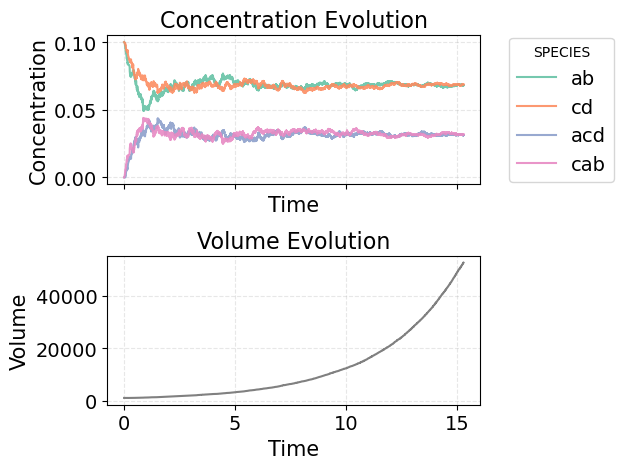

In [35]:
plot(abundances[:,4:], times, volumes, sp_intermediates[4:])

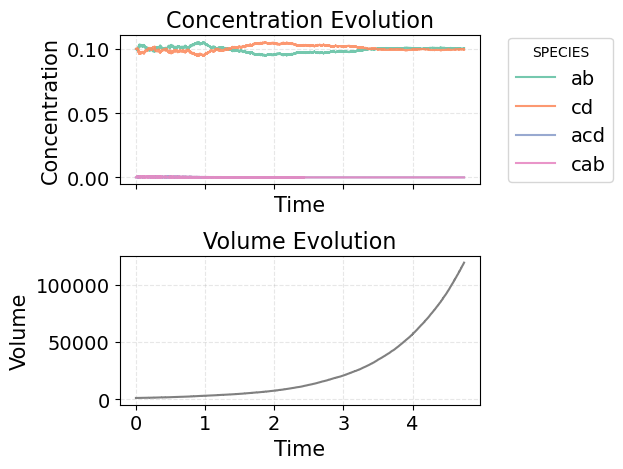

In [55]:
k_intermediates[2] = 1e10
k_intermediates[6]= 1e7
V_in = 1000
abundances_in, times_in, volumesMM_in = chemistry(method, iterations, intermediates, 
                                       initial_species, k_intermediates, V_in)
plot(abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])


## Third order

In [16]:
k_third_order[1] = 0
k_third_order[3] = 0
abundances_TO, timesTO, volumesTO = chemistry(method, iterations, third_order, 
                                       initial_species_third, k_third_order, 1)

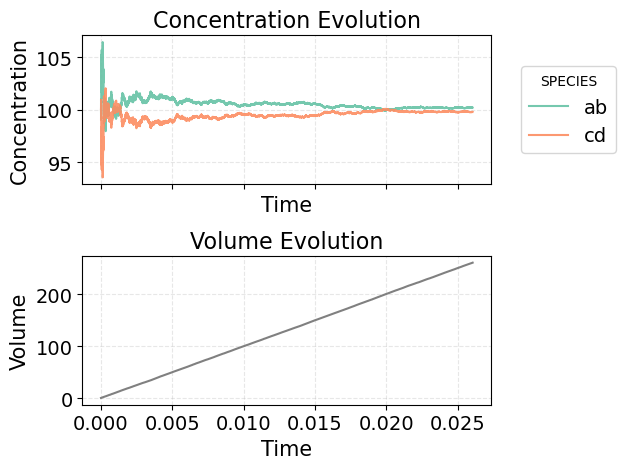

In [17]:
plot(abundances_TO[:,4:], timesTO, volumesTO, sp_thirdorder[4:])

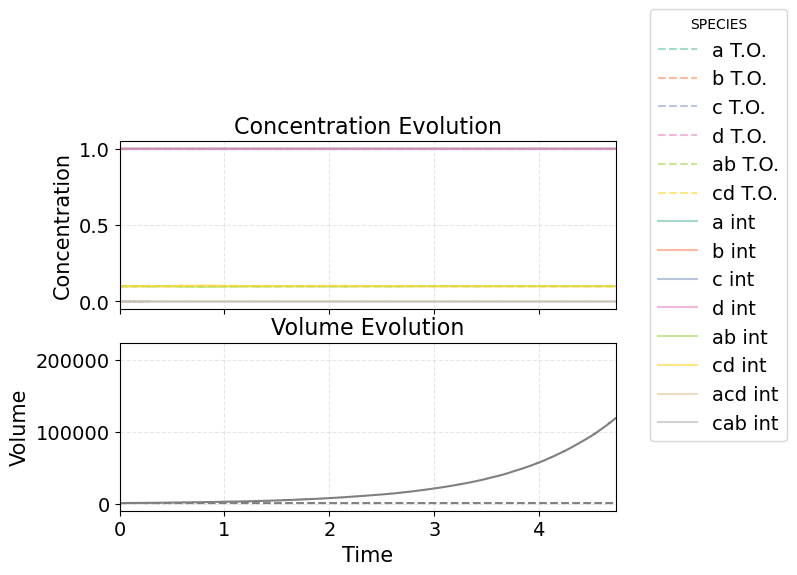

In [38]:
plot_both(abundances_TO[:,4:],timesTO, volumesTO, sp_thirdorder[4:],
          abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])


# volúmenes chiquitos

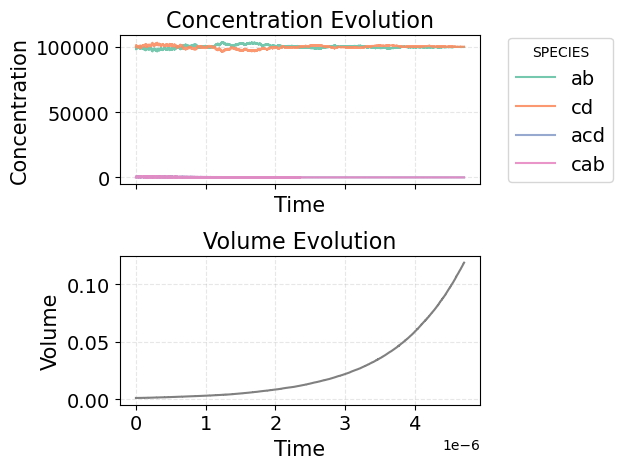

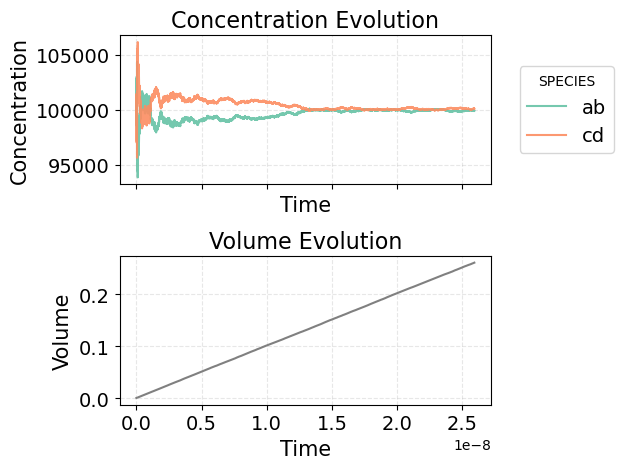

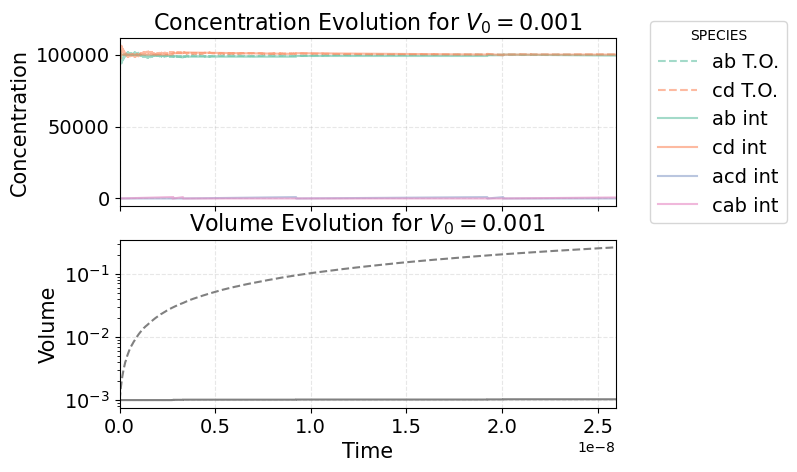

In [50]:
V_in = 0.001
abundances_in, times_in, volumesMM_in = chemistry(method, iterations, intermediates, 
                                       initial_species, k_intermediates, V_in)
plot(abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])

abundances_TO, timesTO, volumesTO = chemistry(method, iterations, third_order, 
                                       initial_species_third, k_third_order, V_in)
plot(abundances_TO[:,4:], timesTO, volumesTO, sp_thirdorder[4:])

plot_both(abundances_TO[:,4:],timesTO, volumesTO, sp_thirdorder[4:],
          abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])

Criterion for stop was # of iterations


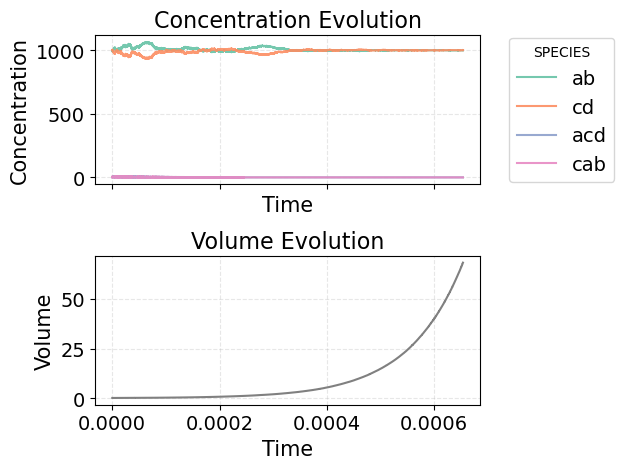

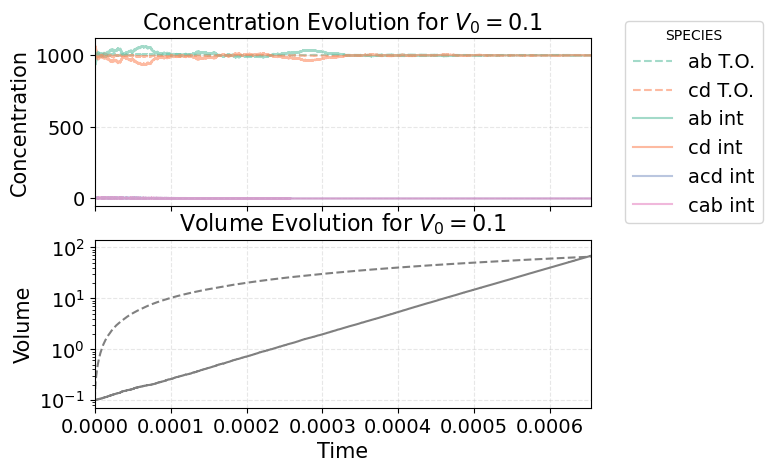

In [75]:
V_in = 0.1
abundances_in, times_in, volumesMM_in = chemistry(method, 3e5, intermediates, 
                                       initial_species, k_intermediates, V_in, threshold= 0)
plot(abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])

# abundances_TO, timesTO, volumesTO = chemistry(method, 2e5, third_order, 
#                                        initial_species_third, k_third_order, V_in, threshold= 0)
# plot(abundances_TO[:,4:], timesTO, volumesTO, sp_thirdorder[4:])

plot_both(abundances_TO[:,4:],timesTO, volumesTO, sp_thirdorder[4:],
          abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])

Criterion for stop was # of iterations


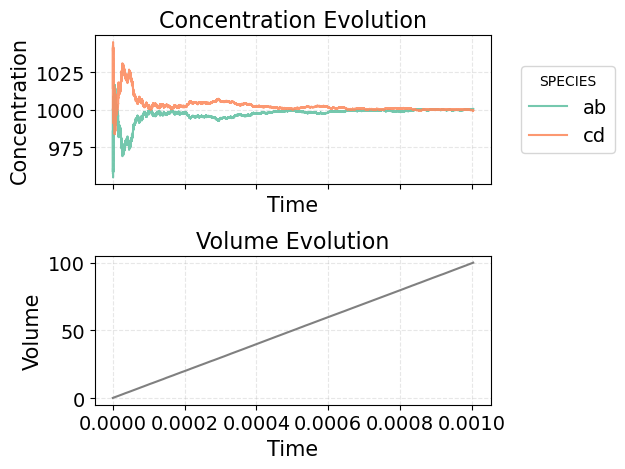

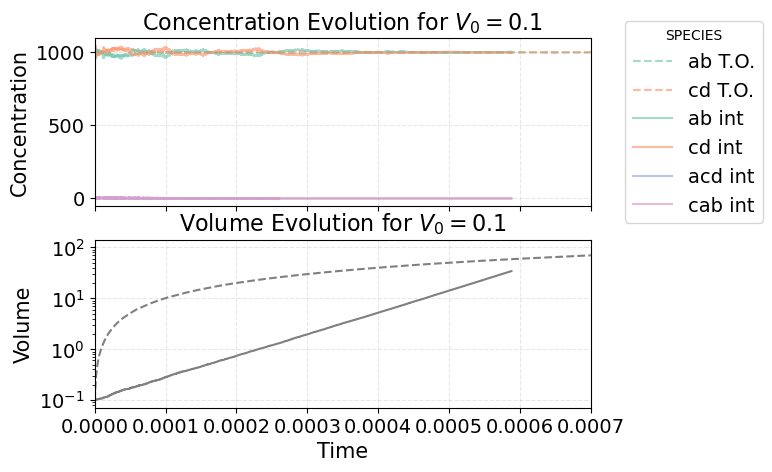

In [66]:
abundances_TO, timesTO, volumesTO = chemistry(method, 2e5, third_order, 
                                       initial_species_third, k_third_order, V_in, threshold= 0)
plot(abundances_TO[:,4:], timesTO, volumesTO, sp_thirdorder[4:])
plot_both(abundances_TO[:,4:],timesTO, volumesTO, sp_thirdorder[4:],
          abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])

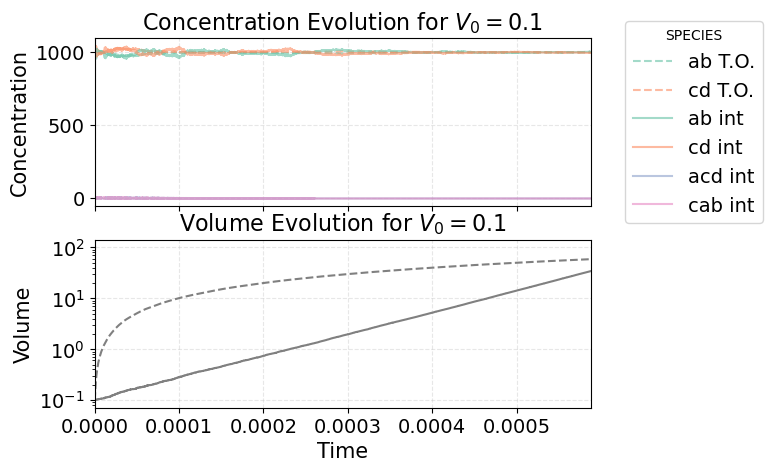

0.0010040894405128422

In [72]:
plot_both(abundances_TO[:,4:], timesTO, volumesTO, sp_thirdorder[4:],
          abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])
timesTO[-1]

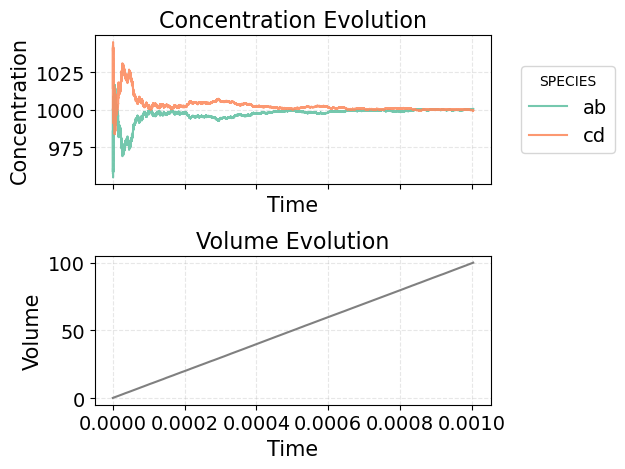

In [73]:
plot(abundances_TO[:,4:], timesTO, volumesTO, sp_thirdorder[4:])


# v= 1

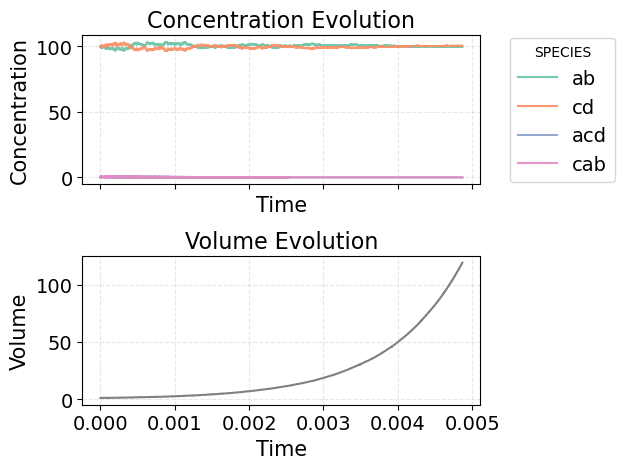

In [ ]:
k_intermediates[2] = 1e10
k_intermediates[6]= 1e7
V_in = 1
abundances_in, times_in, volumesMM_in = chemistry(method, iterations, intermediates, 
                                       initial_species, k_intermediates, V_in)
plot(abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])

abundances_TO, timesTO, volumesTO = chemistry(method, iterations, third_order, 
                                       initial_species_third, k_third_order, V_in)
plot(abundances_TO[:,4:], timesTO, volumesTO, sp_thirdorder[4:])

plot_both(abundances_TO[:,4:],timesTO, volumesTO, sp_thirdorder[4:],
          abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])


# v=100

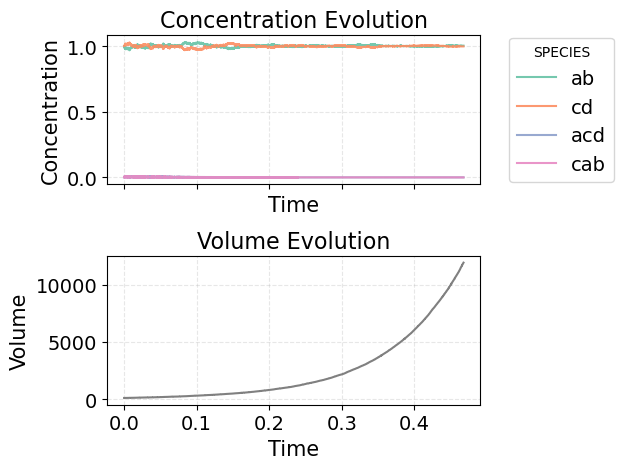

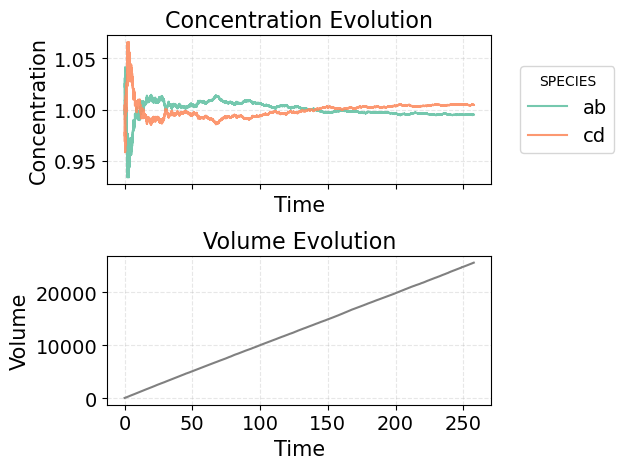

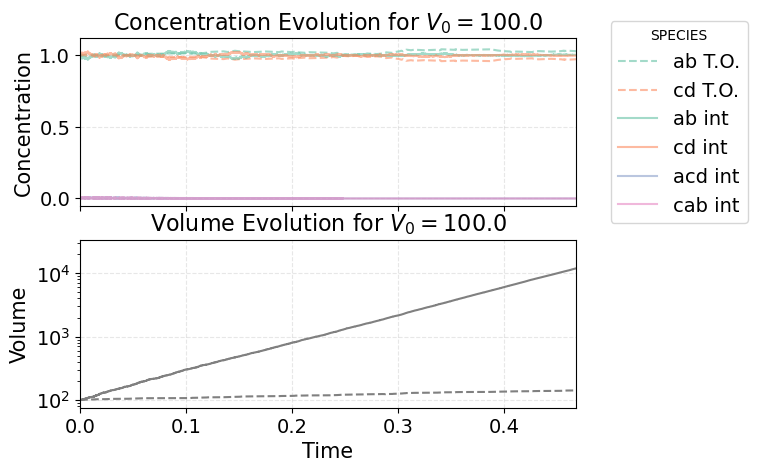

In [ ]:
k_intermediates[2] = 1e10
k_intermediates[6]= 1e7
V_in = 100
abundances_in, times_in, volumesMM_in = chemistry(method, iterations, intermediates, 
                                       initial_species, k_intermediates, V_in)
plot(abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])

abundances_TO, timesTO, volumesTO = chemistry(method, iterations, third_order, 
                                       initial_species_third, k_third_order, V_in)
plot(abundances_TO[:,4:], timesTO, volumesTO, sp_thirdorder[4:])
plot_both(abundances_TO[:,4:],timesTO, volumesTO, sp_thirdorder[4:],
          abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])


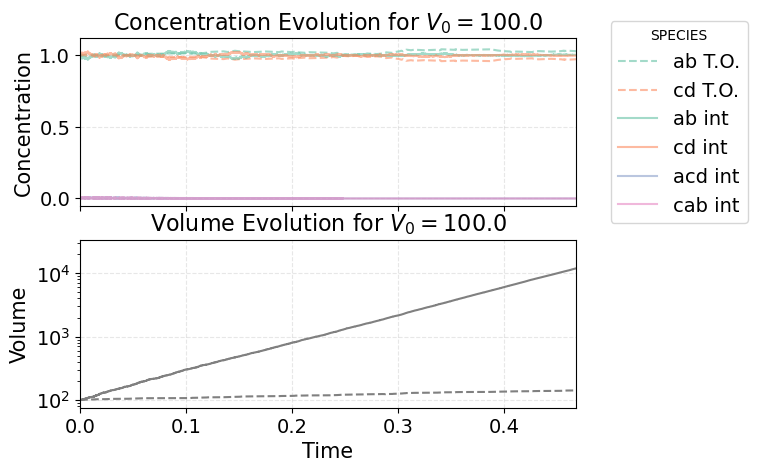

In [ ]:
plot_both(abundances_TO[:,4:],timesTO, volumesTO, sp_thirdorder[4:],
          abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])

# starting from ss

Successfully loaded 9 simulation results.
Successfully loaded 9 simulation results.
Figures for cond = 1e-05


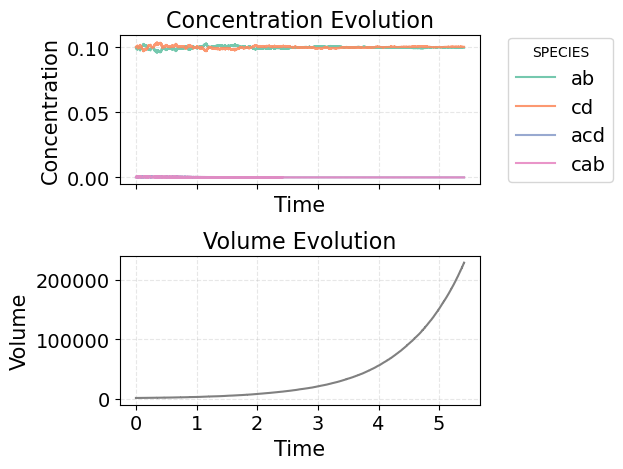

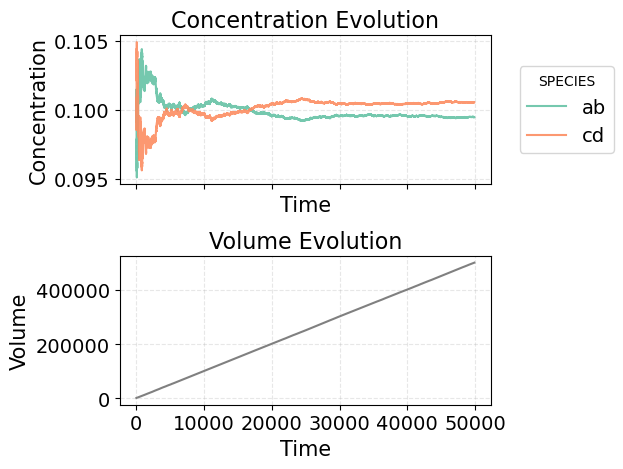

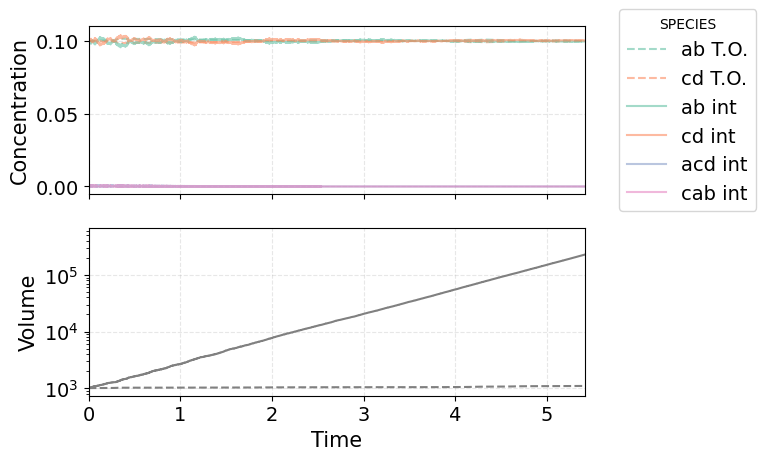

Figures for cond = 0.0001


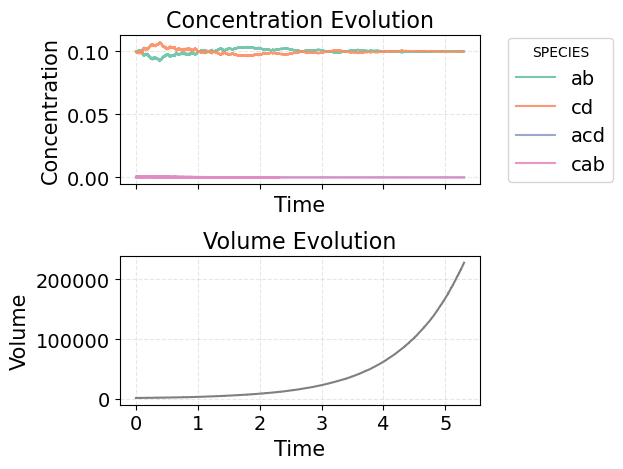

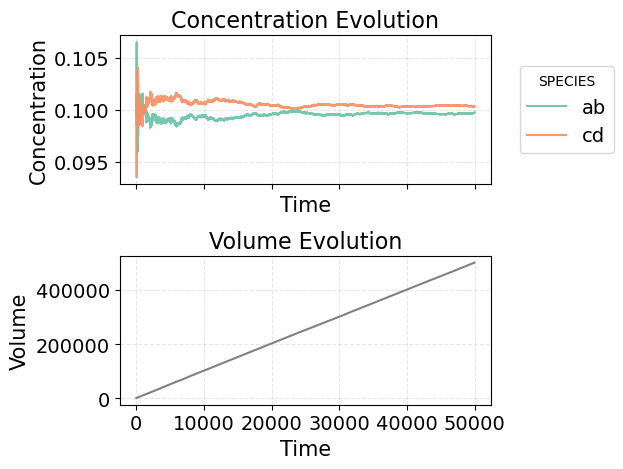

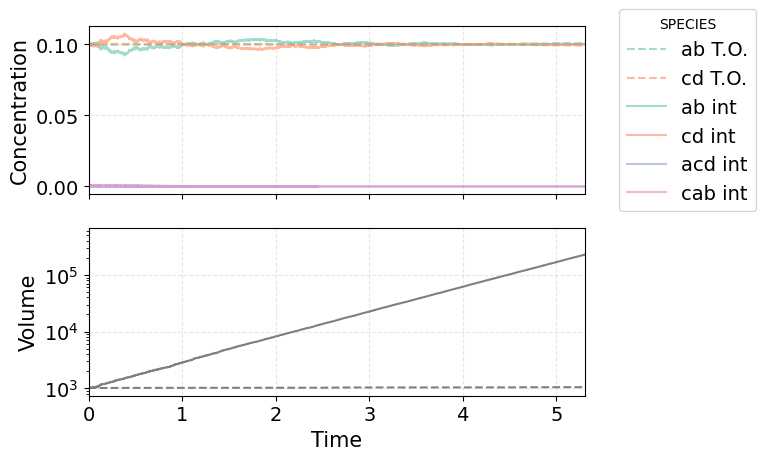

Figures for cond = 0.001


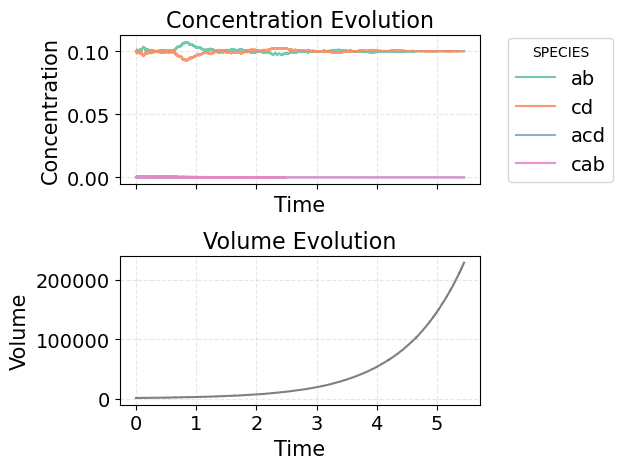

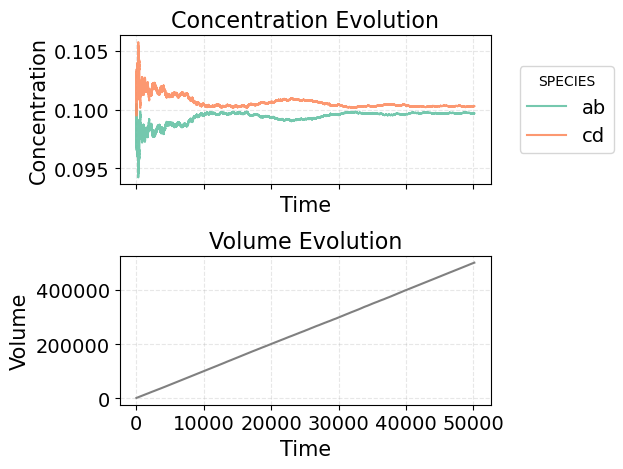

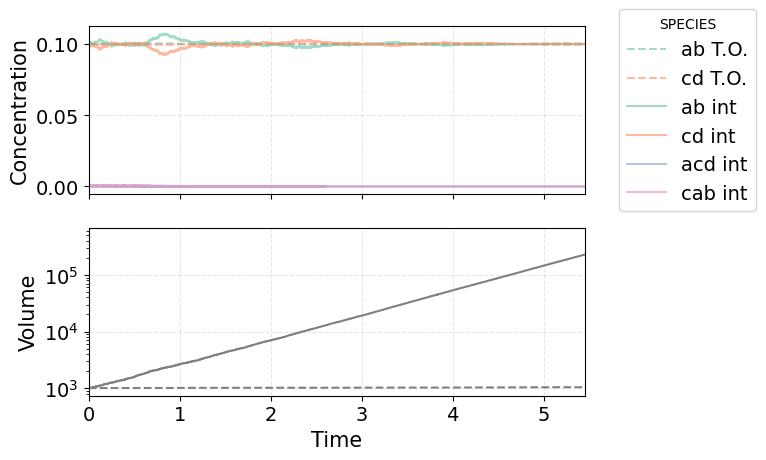

Figures for cond = 0.01


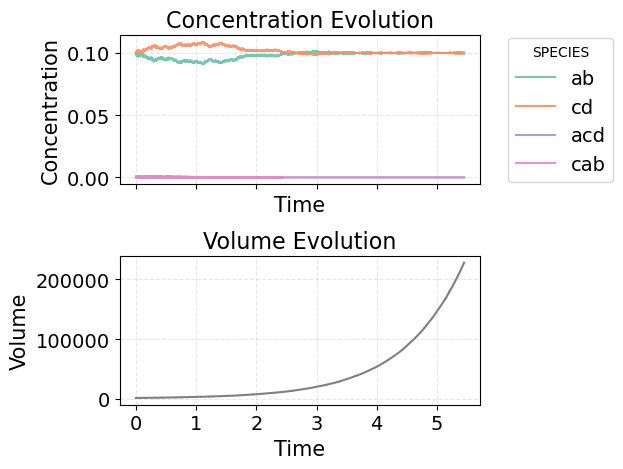

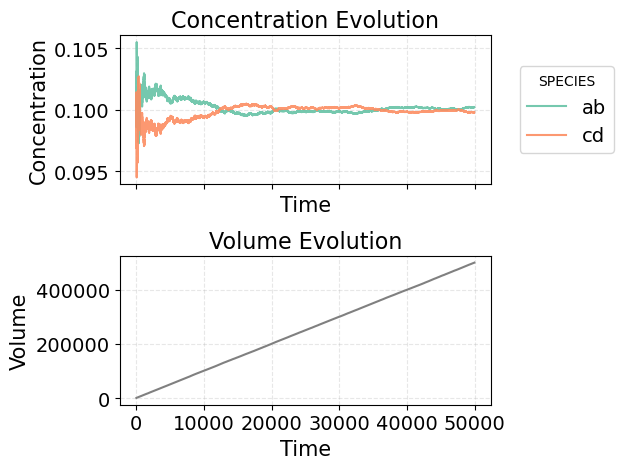

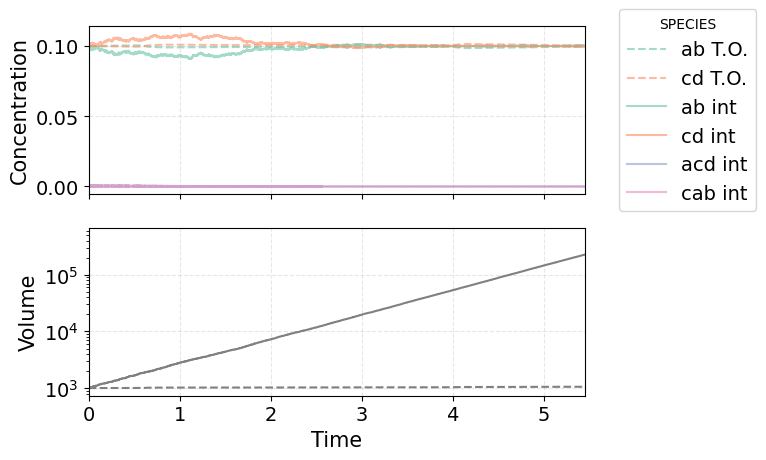

Figures for cond = 0.1


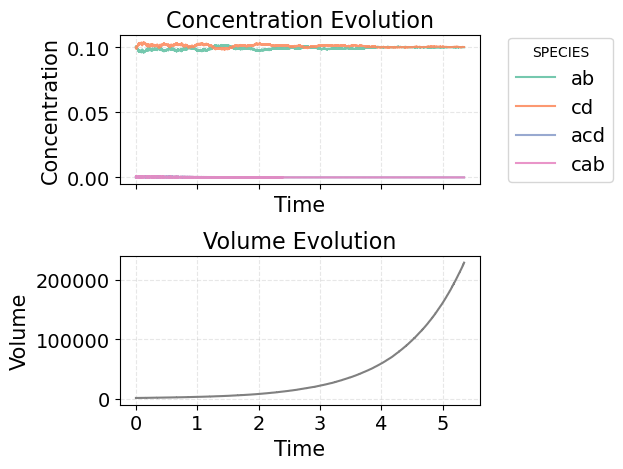

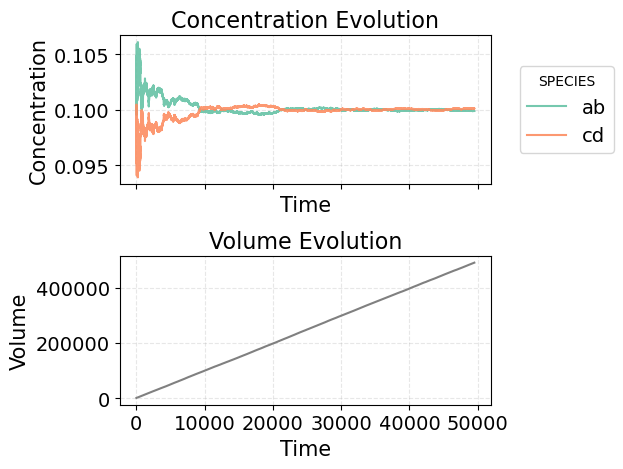

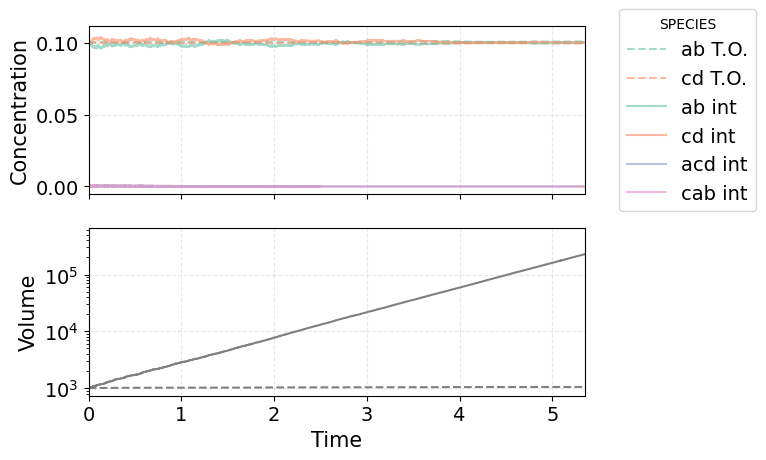

Figures for cond = 1.0


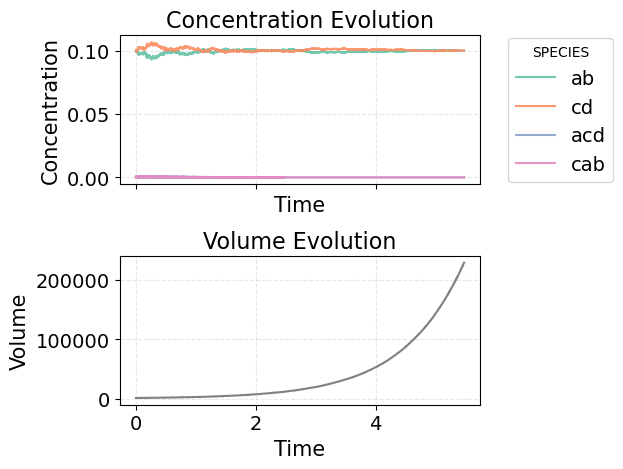

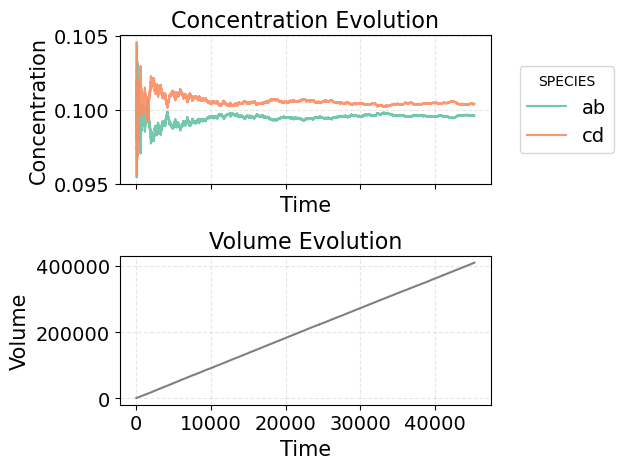

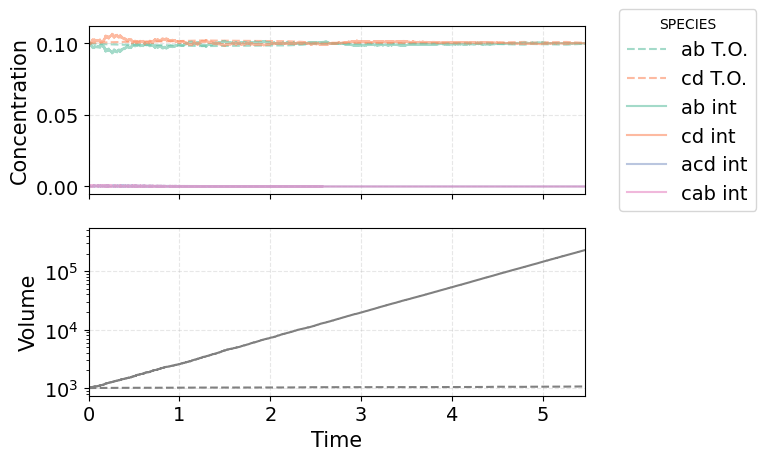

Figures for cond = 10.0


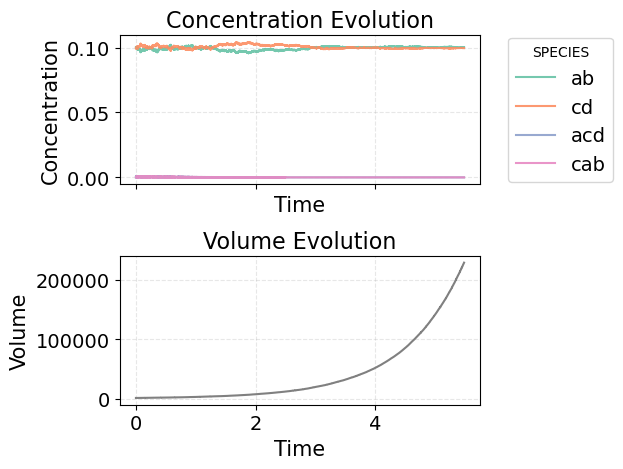

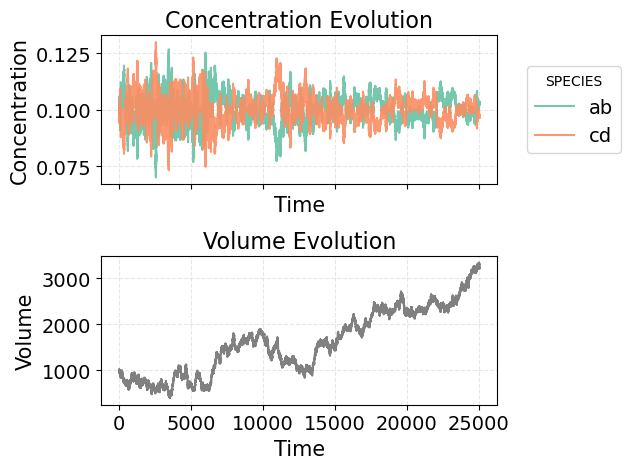

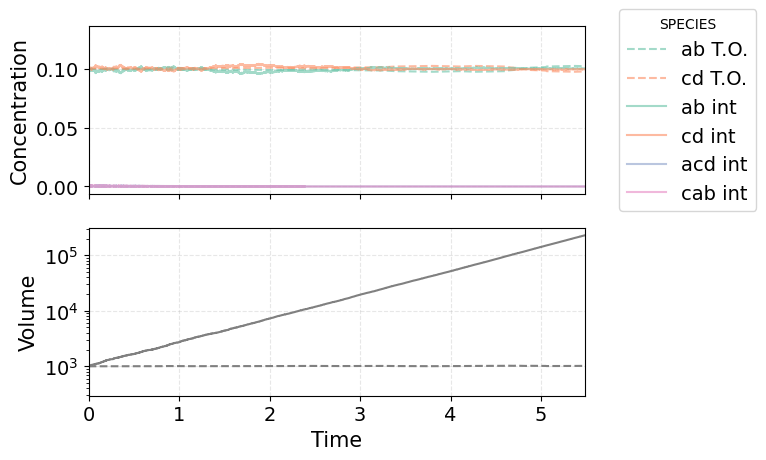

Figures for cond = 100.0


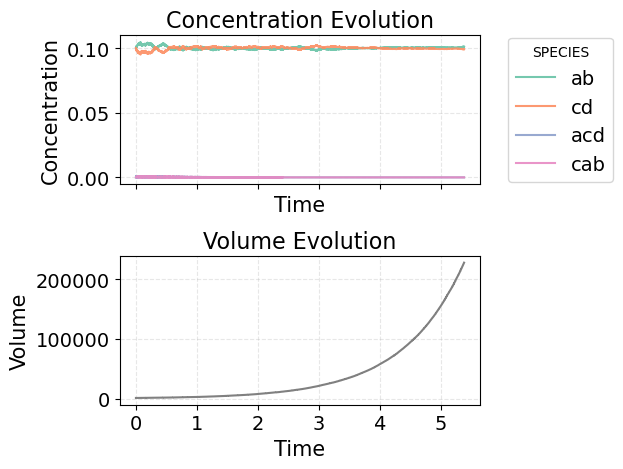

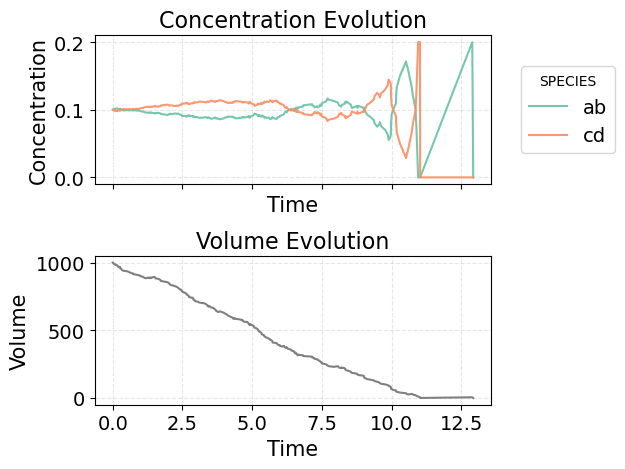

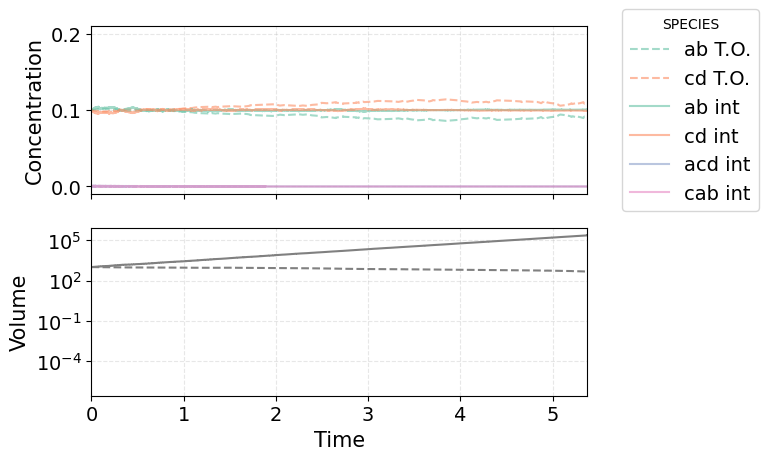

Figures for cond = 1000.0


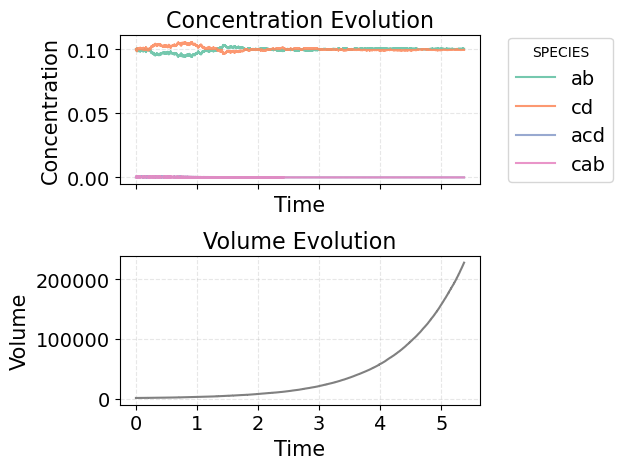

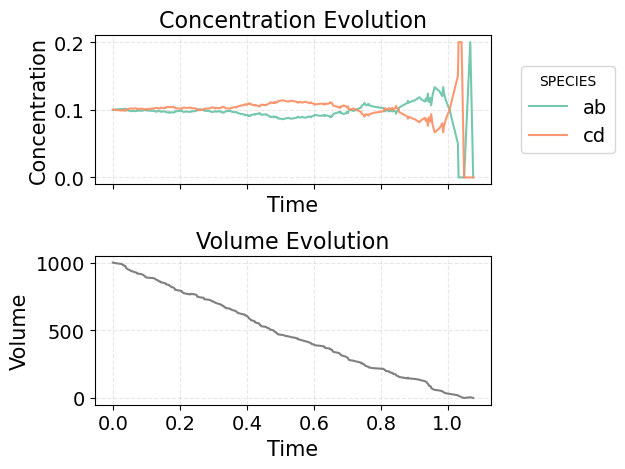

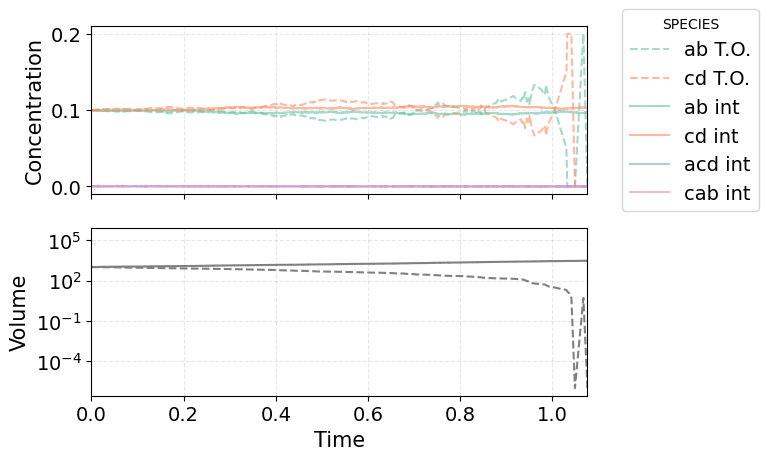

In [7]:
third_order_dict = load_streamed_pickle("../drago_results/third_order2026-02-08_1709.pkl")
intermediates_dict = load_streamed_pickle("../drago_results/intermediates2026-02-08_1709.pkl")

for cond in third_order_dict.keys():
    print(f"Figures for cond = {cond}")
    abundances_in, times_in, volumesMM_in = intermediates_dict[cond]
    plot(abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])

    abundances_TO, timesTO, volumesTO = third_order_dict[cond]
    plot(abundances_TO[:,4:], timesTO, volumesTO, sp_thirdorder[4:])
    
    plot_both(abundances_TO[:,4:],timesTO, volumesTO, sp_thirdorder[4:],
            abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])
    

# not ss

Successfully loaded 9 simulation results.
Successfully loaded 9 simulation results.
Figures for cond = 1e-05


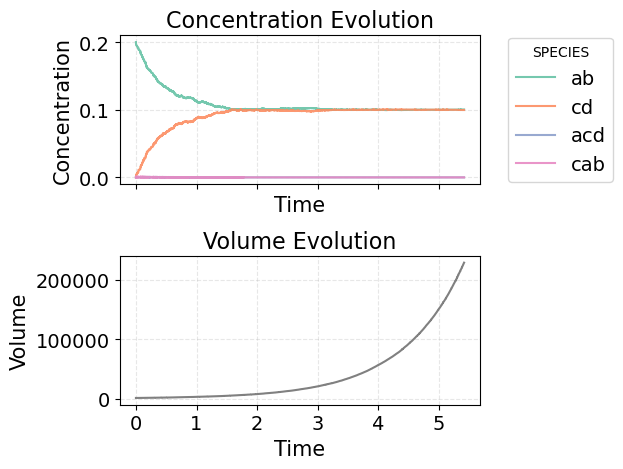

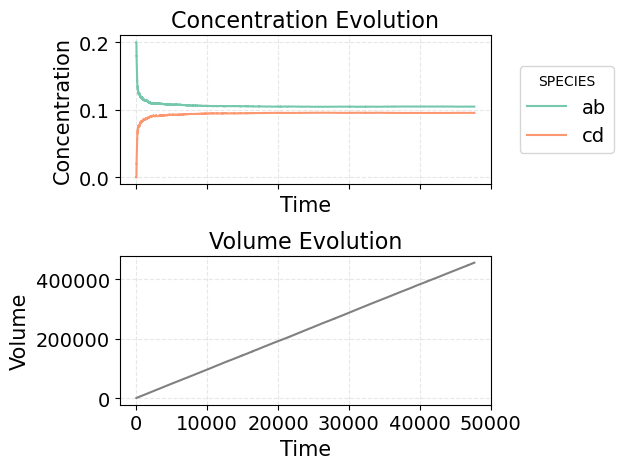

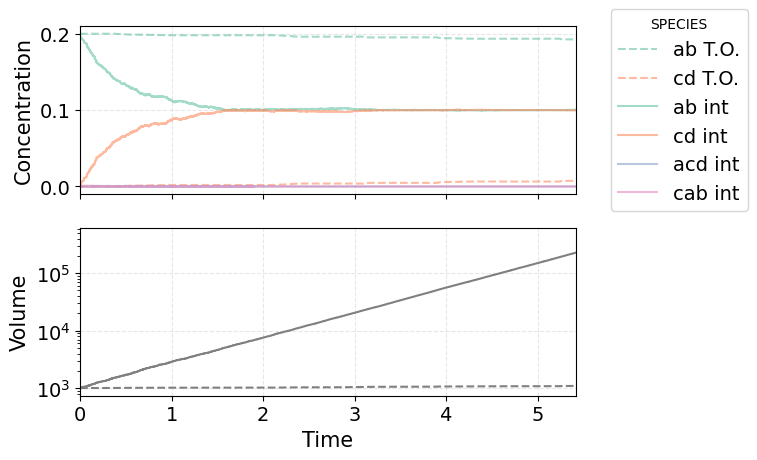

Figures for cond = 0.0001


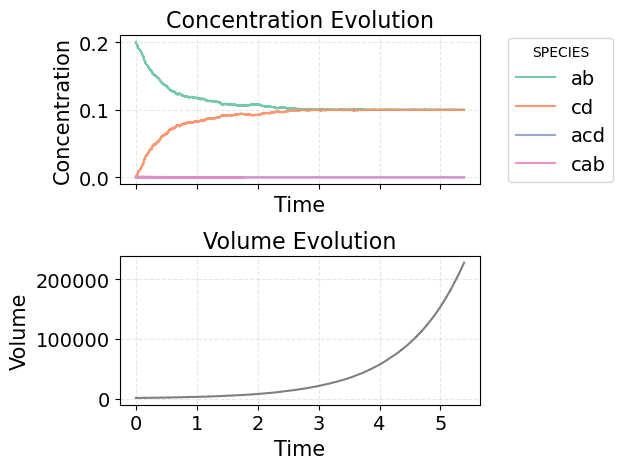

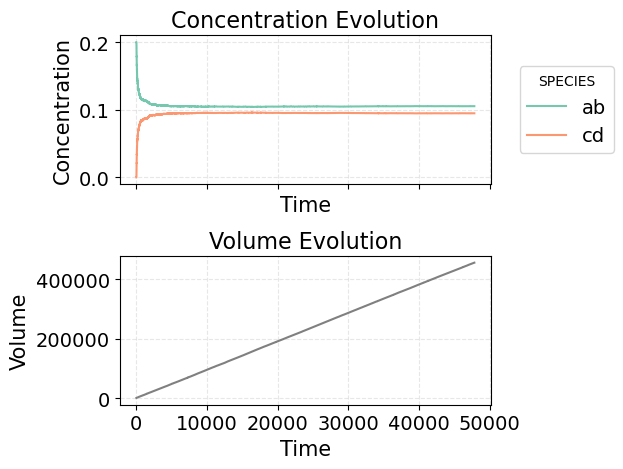

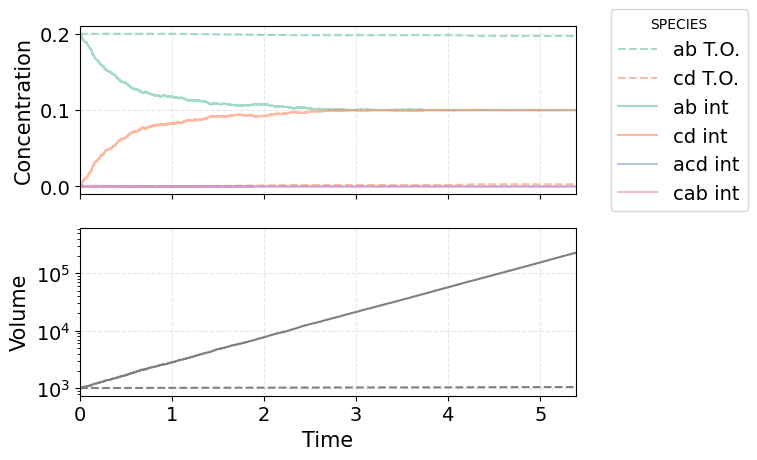

Figures for cond = 0.001


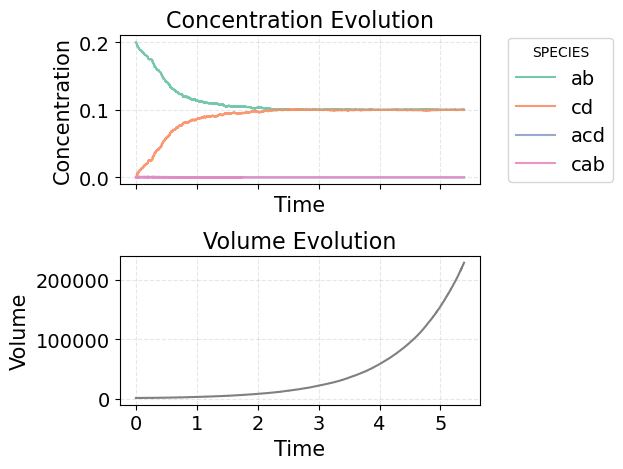

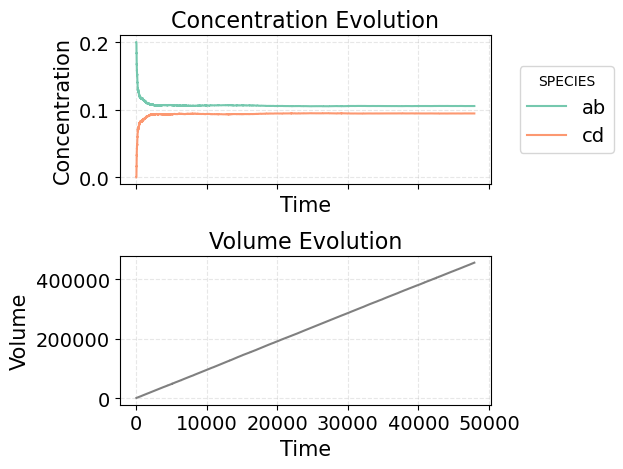

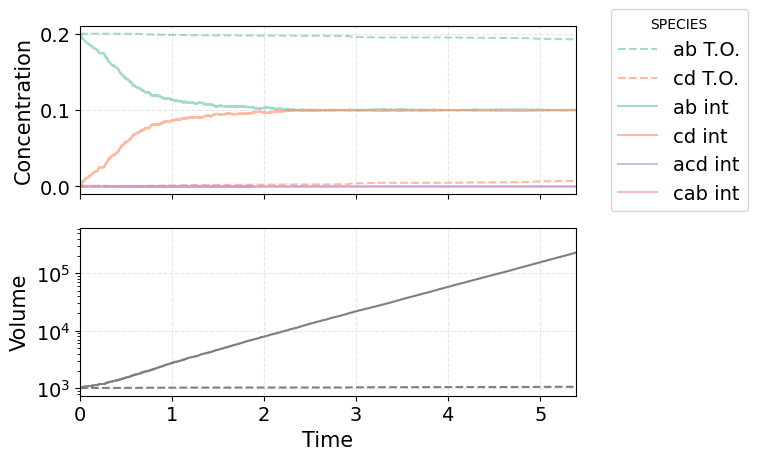

Figures for cond = 0.01


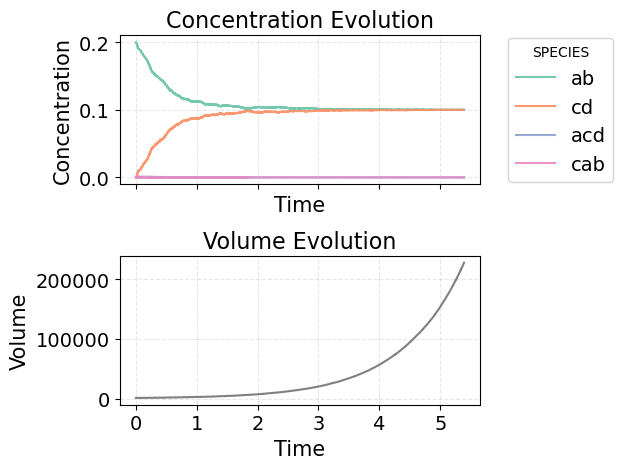

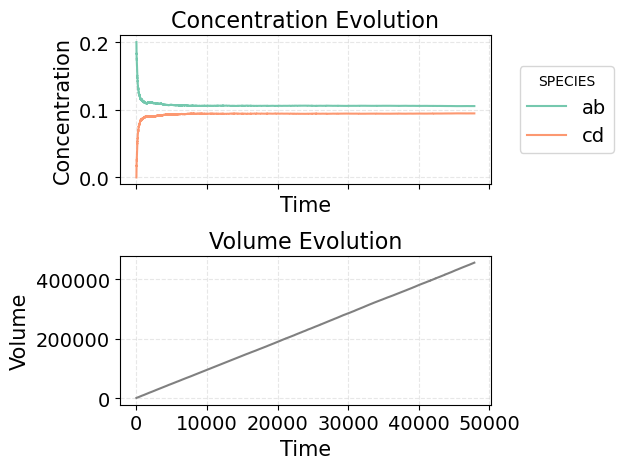

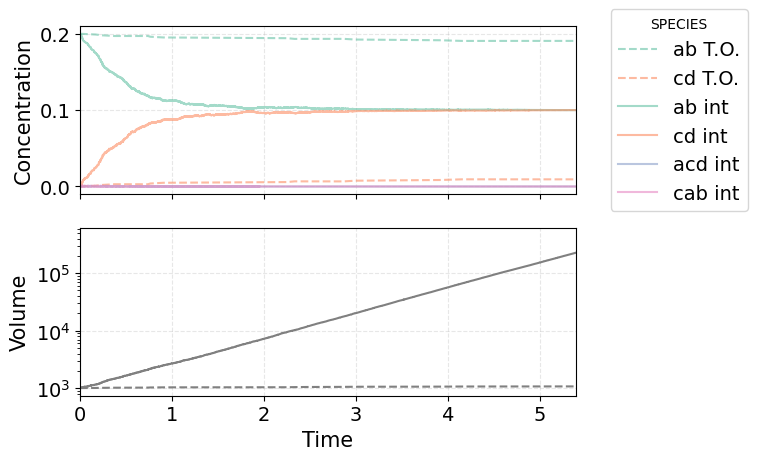

Figures for cond = 0.1


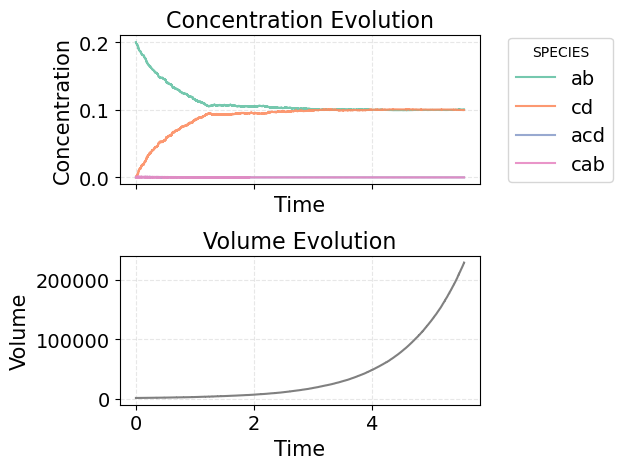

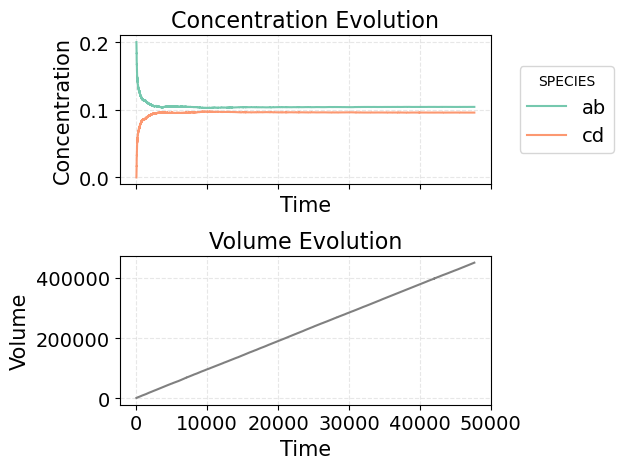

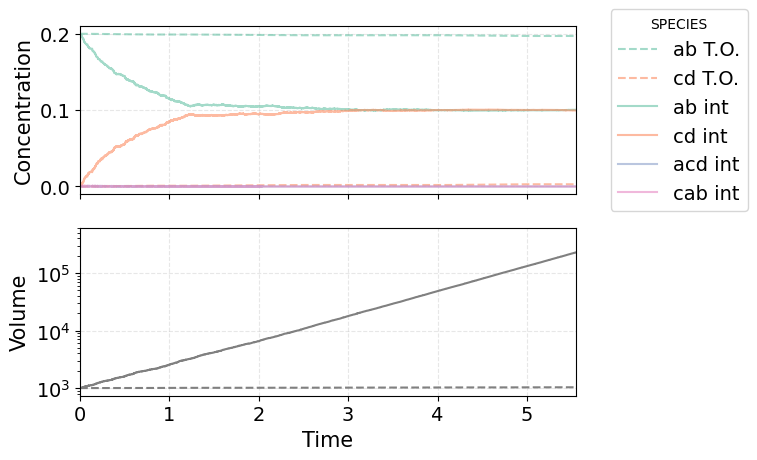

Figures for cond = 1.0


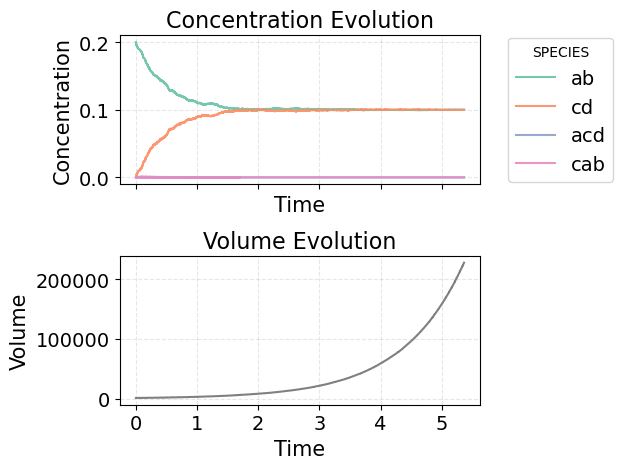

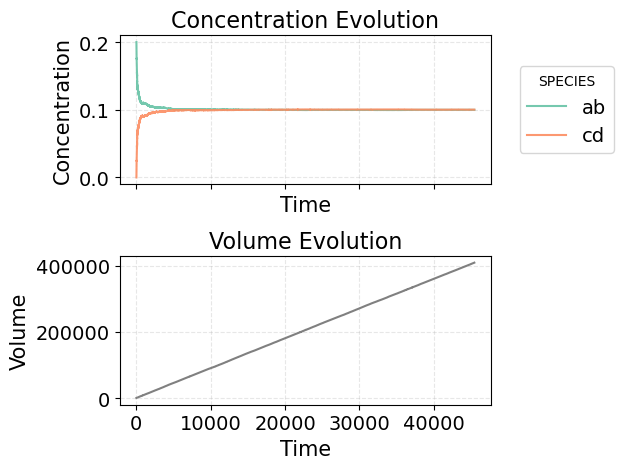

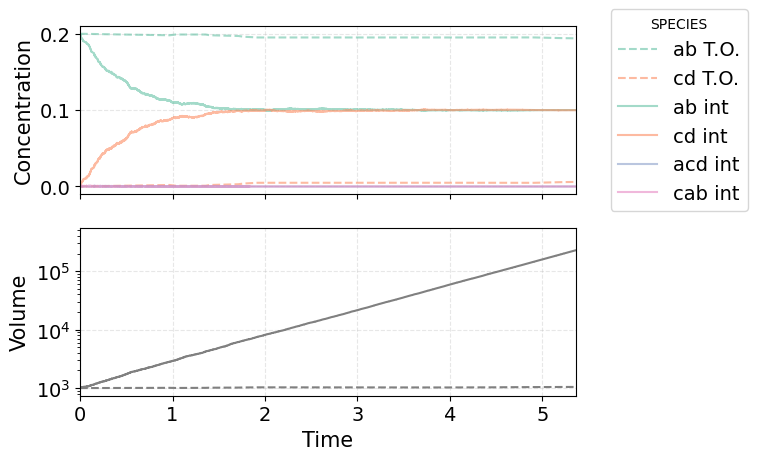

Figures for cond = 10.0


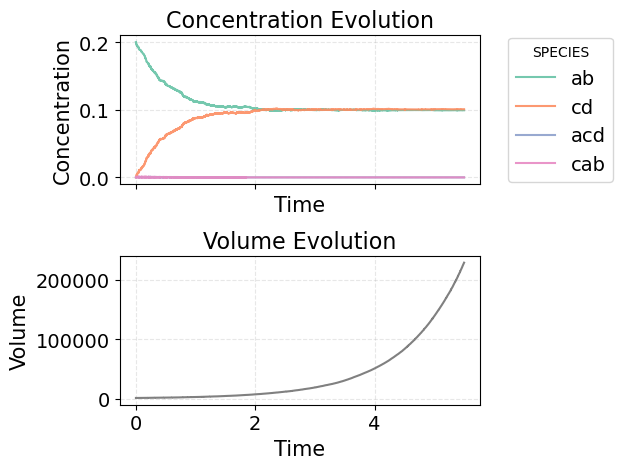

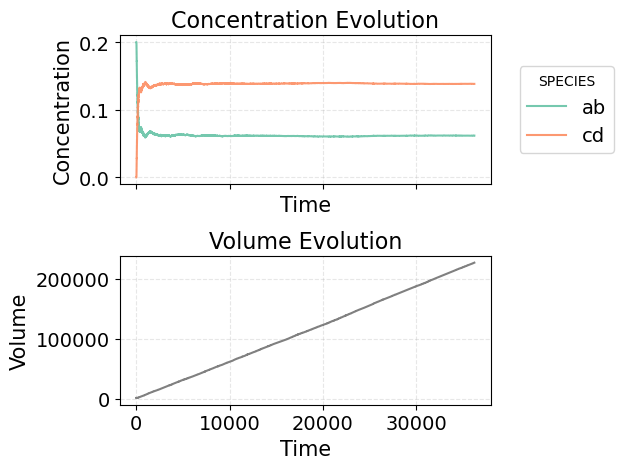

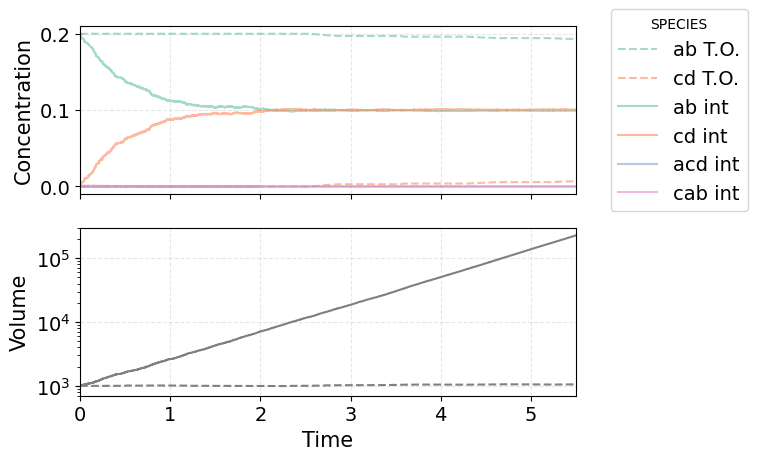

Figures for cond = 100.0


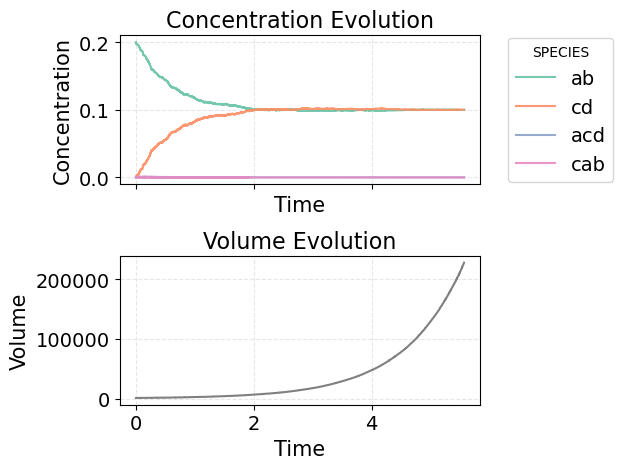

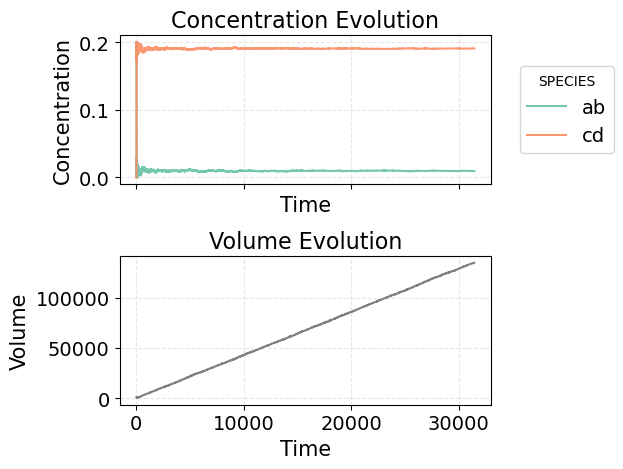

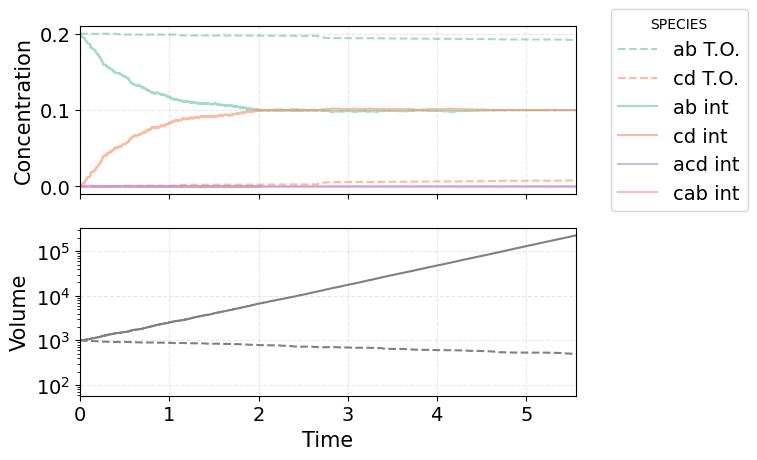

Figures for cond = 1000.0


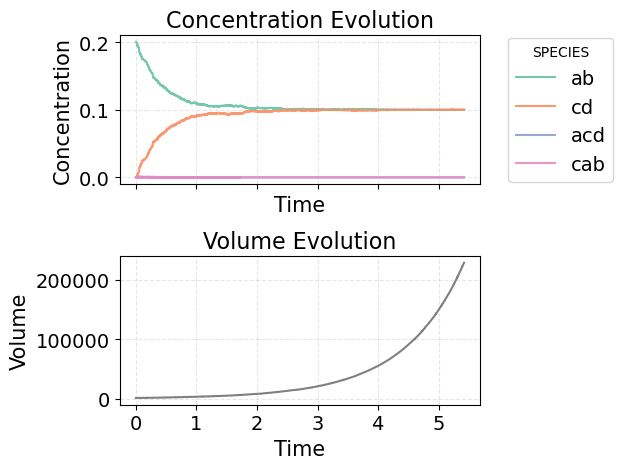

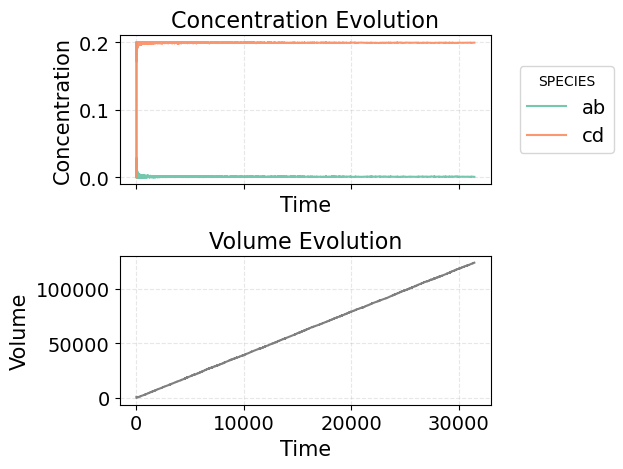

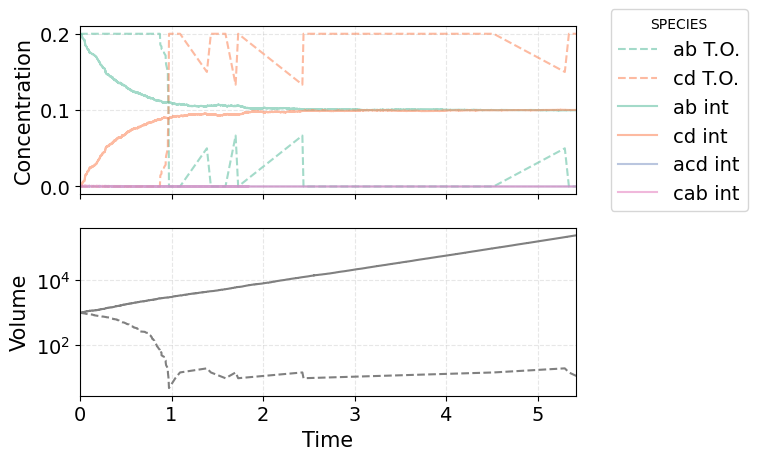

In [7]:
third_order_dict = load_streamed_pickle("../drago_results/third_order2026-02-11_1314.pkl")
intermediates_dict = load_streamed_pickle("../drago_results/intermediates2026-02-11_1314.pkl")

for cond in third_order_dict.keys():
    print(f"Figures for cond = {cond}") # cambiando las k reversas de la primera reacción de cada set (k1 y k5)
    abundances_in, times_in, volumesMM_in = intermediates_dict[cond]
    plot(abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])

    abundances_TO, timesTO, volumesTO = third_order_dict[cond]
    plot(abundances_TO[:,4:], timesTO, volumesTO, sp_thirdorder[4:])
    
    plot_both(abundances_TO[:,4:],timesTO, volumesTO, sp_thirdorder[4:],
            abundances_in[:,4:], times_in, volumesMM_in, sp_intermediates[4:])

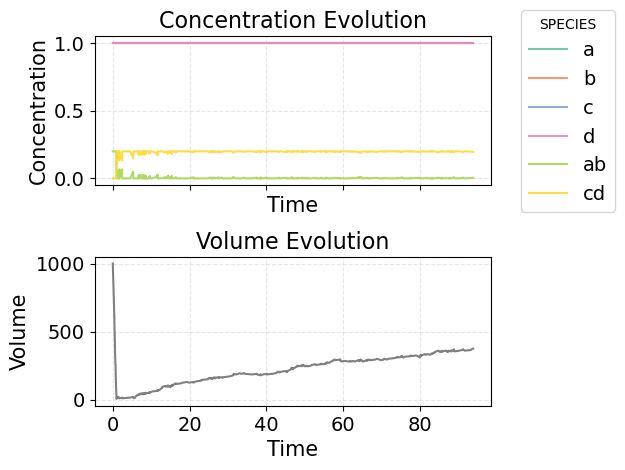

In [9]:
plot(abundances_TO[:500,:], timesTO[:500], volumesTO[:500], sp_thirdorder)

In [10]:
def identify_reaction_history(abundance_matrix, c_matrix):
    """
    abundance_matrix: (Steps x Species) matrix of counts
    c_matrix: (Reactions x Species) stoichiometry matrix
    """
    # 1. Calculate the change in molecules between each time step
    # diffs will have shape (Steps-1, Species)
    # eliminamos food species: no cambian según la matriz c
    diffs = np.diff(abundance_matrix, axis=0)[:, 4:]
    c_matrix = c_matrix[:, 4:]
    reaction_history = []
    
    # 2. Match each row of diffs to a row in c_matrix
    for delta in diffs:
        # Check which row in C is equal to the delta
        # We use np.all(..., axis=1) to check all species at once
        matches = np.where((c_matrix == delta).all(axis=1))[0]
        
        if len(matches) > 0:
            # Append the index of the matching reaction
            reaction_history.append(matches[0])
        else:
            # This handles cases where no change occurred (if your code allows that)
            reaction_history.append(None) 
            
    return np.array(reaction_history)

def plot_reaction_timeline(times, reaction_labels, a, f, species):
    reaction_history=identify_reaction_history(a, c_matrix(read_file(f), species, get_header(f)))
    
    plt.figure(figsize=(12, 4))
    
    # Plotting the events
    # Ensure reaction_history is filtered for None values if any remain
    plt.scatter(times[1:], reaction_history, marker='|', s=100, color='firebrick')
    
    # Reverse the Y-axis so 0 is at the top
    plt.gca().invert_yaxis()
    
    # Formatting
    plt.yticks(range(len(reaction_labels)), reaction_labels)
    plt.tick_params(axis='both', labelsize=tick_fs)
    plt.xlabel("Time", fontsize=label_fs)
    plt.ylabel("Reaction", fontsize=label_fs)
    plt.title("Reaction Event Timeline", fontsize=title_fs)
    plt.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

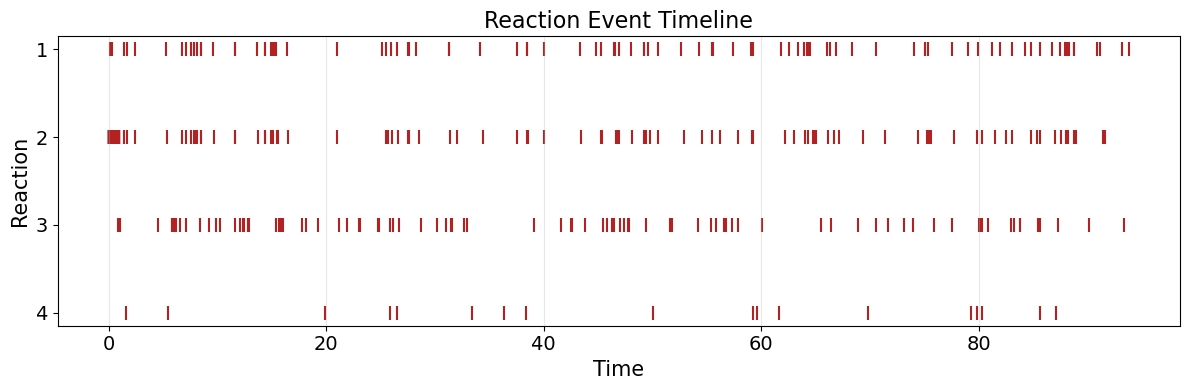

In [14]:
plot_reaction_timeline(timesTO[:500], range(1,5), abundances_TO[:500], third_order, sp_thirdorder)